<h1><center>HUMAN ACTIVITY RECOGNITION</center></h1>
<h2><center> TOPICS ON TIME SERIES CLASSIFICATION</center></h2>

## 1. PRESENTATION

This section comes from **Brownlee, J (2018) `Deep Learning for Time Series`**. The reference can be found at: 



https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/

### 1.1. WHAT IS IT ?

Activity recognition aims to recognize the actions and goals of one or more agents from a series of observations on the agents' actions and the environmental conditions. Since the 1980s, this research field has captured the attention of several computer science communities due to its strength in providing personalized support for many different applications and its connection to many different fields of study such as medicine, human-computer interaction, or sociology.

Due to its many-faceted nature, different fields may refer to activity recognition: 

> - as plan recognition, 
> - goal recognition, 
> - intent recognition, 
> - behavior recognition, 
> - location estimation and location-based services
    

### 1.2. WHAT ARE THE TYPICAL CLASSES OF HAR PROBLEMS?

**Sensor-based, single-user activity recognition**

Sensor-based activity recognition integrates the emerging area of sensor networks with novel data mining and machine learning techniques to model a wide range of human activities. Mobile devices (e.g. smart phones) provide sufficient sensor data and calculation power to enable physical activity recognition to provide an estimation of the energy consumption during everyday life. 

Sensor-based activity recognition researchers believe that by empowering ubiquitous computers and sensors to monitor the behavior of agents (under consent), these computers will be better suited to act on our behalf.

**Levels of sensor-based activity recognition**

Sensor-based activity recognition is a challenging task due to the inherent noisy nature of the input. 

Thus, `statistical modeling has been the main thrust in this direction in layers, where the recognition at several intermediate levels is conducted and connected.` 

> - At the lowest level where the sensor data are collected, statistical learning concerns how to find the detailed locations of agents from the received signal data.

> - At an intermediate level, statistical inference may be concerned about how to recognize individuals' activities from the inferred location sequences and environmental conditions at the lower levels. Furthermore, 

> - at the highest level a major concern is to find out the overall goal or subgoals of an agent from the activity sequences through a mixture of logical and statistical reasoning.

**Sensor-based, multi-user activity recognition**

Recognizing activities for multiple users using on-body sensors first appeared in the work by ORL using active badge systems in the early 1990s. Other sensor technology such as acceleration sensors were used for identifying group activity patterns during office scenarios. Activities of Multiple Users in intelligent environments are addressed in Gu et al. In this work, they investigate the fundamental problem of recognizing activities for multiple users from sensor readings in a home environment, and propose a novel pattern mining approach to recognize both single-user and multi-user activities in a unified solution.

**Sensor-based group activity recognition**

Recognition of group activities is fundamentally different from single, or multi-user activity recognition in that the goal is to recognize the behavior of the group as an entity, rather than the activities of the individual members within it.

Group behavior is emergent in nature, meaning that the properties of the behavior of the group are fundamentally different then the properties of the behavior of the individuals within it, or any sum of that behavior.

The main challenges are in modeling the behavior of the individual group members, as well as the roles of the individual within the group dynamic and their relationship to emergent behavior of the group in parallel.

Challenges which must still be addressed include quantification of the behavior and roles of individuals who join the group, integration of explicit models for role description into inference algorithms, and scalability evaluations for very large groups and crowds. Group activity recognition has applications for crowd management and response in emergency situations, as well as for social networking and Quantified Self applications.

### 1.3. SETTING UP AN EXAMPLE

This exercise is divided in four sections; they are:

> - Activity Recognition Using Smartphones Dataset
> - Develop an LSTM Network Model
> - Develop a CNN-LSTM Network Model
> - Develop a ConvLSTM Network Model
> - Activity Recognition Using Smartphones Dataset


**`Human Activity Recognition, or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors`.**

A standard human activity recognition dataset is the **‘Activity Recognition Using Smart Phones Dataset’** made available in 2012.

It was prepared and made available by **Davide Anguita, et al. (2012)** from the University of Genova, Italy and is described in full in their 2013 paper **`“A Public Domain Dataset for Human Activity Recognition Using Smartphones.” `** The dataset was modeled with machine learning algorithms in their paper titled **`“Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine."`**


### THE FOLLOWING VIDEO ILLUSTRATES OUR EXAMPLE


https://youtu.be/XOEN9W05_4A


### ABOUT THE DATASET
The dataset was made available and can be downloaded for free from the UCI Machine Learning Repository.


- The data was collected from 30 subjects aged between 19 and 48 years old performing one of six standard activities while wearing a waist-mounted smartphone that recorded the movement data. 

- Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.


The six activities performed were as follows:

> - Walking
> - Walking Upstairs
> - Walking Downstairs
> - Sitting
> - Standing
> - Laying


The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smart phone, specifically a Samsung Galaxy S II. 

Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice; once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made available. The pre-processing steps included:

**Pre-processing accelerometer and gyroscope using noise filters.**

- Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
- Splitting of accelerometer data into gravitational (total) and body motion components.

Feature engineering was applied to the window data, and a copy of the data with these engineered features was made available.

> - A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. **The result was a 561 element vector of features.**

> - The dataset was split into train (70%) and test (30%) sets based on data for subjects, e.g. 21 subjects for train and nine for test.

> - Experiment results with a support vector machine intended for use on a smartphone (e.g. fixed-point arithmetic) resulted in a **predictive accuracy of 89% on the test dataset, achieving similar results as an unmodified SVM implementation**.


The data is provided as a single zip file that is about 58 megabytes in size. The direct link for this download is below:

https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

In order to properly run the exercise in this tutorial, We will have to the dataset and unzip all files into a new directory in your current working directory named **`“HARDataset”`**

### 2. LOAD DATA

We will need to use 4 functions to put together a data frame suitable for use by keras.

We can then load all data:

> - For a given group (train or test) into a single `three-dimensional NumPy array`, where the dimensions of the array are:  **[samples, time steps, features].**

> - To make this clearer, there are: 
>> - 128 time steps and nine features, 
>> - where the number of samples is the number of rows in any given raw signal data file.

> - The load_group() function below implements this behavior. 

> - The dstack() NumPy function allows us to stack each of the loaded 3D arrays into a single 3D array where the variables are separated on the third dimension (features).

We can use this function to load all input signal data for a given group, **such as train or test**.


In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

In [3]:
trainX, trainy, testX, testy=load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


#### EXPLORING THE DATASET

**trainX and trainy**

In [4]:
trainX.shape

(7352, 128, 9)

Lets take the first element of the training atrribute set. As expected we have 128 time instances and the 9 attributes. So is a full set of 9 time series of the attrributes.

In [5]:
trainX[1].shape

(128, 9)

This exercise of measuring 128 seconds of one set of attributes is done again a total of $7352+2948 = 10,300 $ times.

The 9 attributes are:

> - Body Acceleration in the direction of x
> - Body Acceleration in the direction of y
> - Body Acceleration in the direction of z
> - Body Gyro in the direction of x
> - Body Gyro in the direction of y
> - Body Gyro in the direction of z
> - Total acceleration in the direction of x
> - Total acceleration in the direction of y
> - Total acceleration in the direction of z




Each csv file has the aggregate dimension of 10,300 samples, 1 attribute and 128 seconds of history. 

Remember that the tuples are **[sample, timesteps, features]**

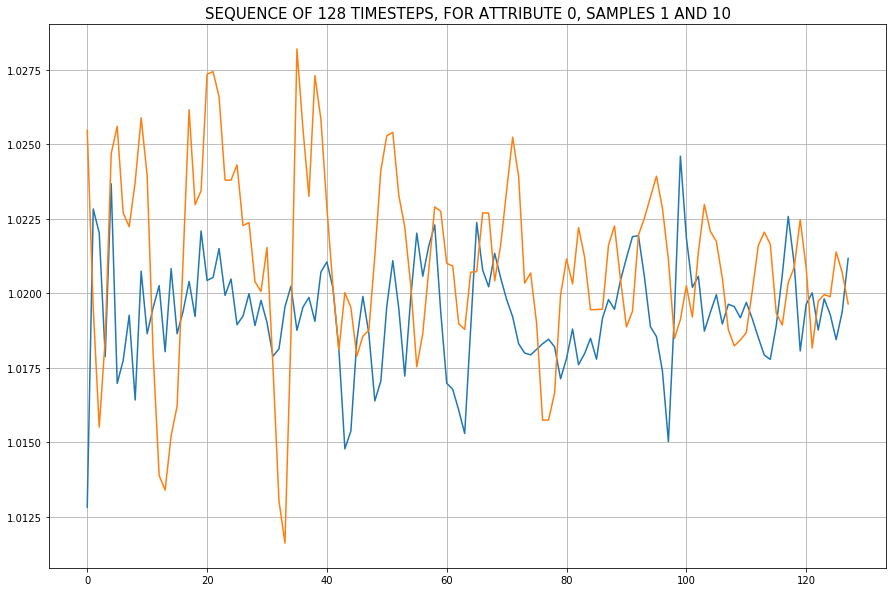

In [6]:
t1=trainX[0,:,0]
t2=trainX[10,:,0]

import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,10))
plt.grid()
plt.title("SEQUENCE OF 128 TIMESTEPS, FOR ATTRIBUTE 0, SAMPLES 1 AND 10", fontsize=15)
plt.plot(t1),
plt.plot(t2)
plt.show()

We can then load all data for a given group (train or test) into a single three-dimensional NumPy array, where the dimensions of the array are [samples, time steps, features].


The **load_group()** function below implements this behavior. The dstack() NumPy function allows us to stack each of the loaded 3D arrays into a single 3D array where the variables are separated on the third dimension (features).

We can use this function to load all input signal data for a given group, such as train or test.

The **load_dataset_group()** function below loads all input signal data and the output data for a single group using the consistent naming conventions between the directories

### 3. THE STANDARD LSTM MODEL

Now that we have the data loaded into memory ready for modeling, we can define, fit, and evaluate an LSTM model.

We can define a function named evaluate_model() that takes the train and test dataset, fits a model on the training dataset, evaluates it on the test dataset, and returns an estimate of the model’s performance.

First, we must define the LSTM model using the Keras deep learning library.

> - The model requires a three-dimensional input with [samples, time steps, features]. This is exactly how we have loaded the data, **`where one sample is one window of the time series data`**, each window has 128 time steps, and a time step has nine variables or features.

> - The output for the model will be a six-element vector containing **``the probability of a given window belonging to each of the six activity types``**.

These input and output dimensions are required when fitting the model, and we can extract them from the provided training dataset.

#### THE HYPERPARAMETERS


The model is defined as a Sequential Keras model, for simplicity.

> - We will define the model as having a single LSTM hidden layer. 
> - This is followed by a dropout layer intended to reduce overfitting of the model to the training data. 
> - Finally, a dense fully connected layer is used to interpret the features extracted by the LSTM hidden layer, before a final output layer is used to make predictions.
> - The efficient Adam version of stochastic gradient descent will be used to optimize the network, 
> - The categorical cross entropy loss function will be used given that we are learning a multi-class classification problem.

The definition of the model is listed below.

In [7]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

####  THE RESULTS

We cannot judge the skill of the model from a single evaluation.

The reason for this is that neural networks are stochastic, meaning that a different specific model will result when training the same model configuration on the same data.

This is a feature of the network in that it gives the model its adaptive ability, but requires a slightly more complicated evaluation of the model.

We will repeat the evaluation of the model multiple times, then summarize the performance of the model across each of those runs. For example, we can call evaluate_model() a total of 10 times. This will result in a population of model evaluation scores that must be summarized.

In [8]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))


We can summarize the sample of scores by calculating and reporting the mean and standard deviation of the performance. The mean gives the average accuracy of the model on the dataset, whereas the standard deviation gives the average variance of the accuracy from the mean.

The function summarize_results() below summarizes the results of a run.

We can bundle up the repeated evaluation, gathering of results, and summarization of results into a main function for the experiment, called run_experiment(), listed below.

By default, the model is evaluated 10 times before the performance of the model is reported

In [9]:
# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

In [10]:
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
>#1: 90.872
>#2: 91.144
>#3: 85.171
>#4: 89.311
>#5: 89.549
>#6: 89.345
>#7: 89.243
>#8: 91.144
>#9: 86.121
>#10: 89.820
[90.87207317352295, 91.14353656768799, 85.17135977745056, 89.31116461753845, 89.54869508743286, 89.34509754180908, 89.24329876899719, 91.14353656768799, 86.1214816570282, 89.8201584815979]
Accuracy: 89.172% (+/-1.913)


## 4. THE MODEL WITH A CNN + LSTM ARCHITECTURE


The CNN LSTM architecture involves using Convolutional Neural Network (CNN) layers for feature extraction on input data combined with LSTMs to support sequence prediction.

CNN LSTMs were developed for visual time series prediction problems and the application of generating textual descriptions from sequences of images (e.g. videos). Specifically, the problems of:

> - Activity Recognition: Generating a textual description of an activity demonstrated in a sequence of images.
> - Image Description: Generating a textual description of a single image.
> - Video Description: Generating a textual description of a sequence of images.

To learn more about the consequences of combining these models, see the paper:

**Convolutional, Long Short-Term Memory, fully connected Deep Neural Networks, 2015**.

The *CNN LSTM* model will read subsequences of the main sequence in as blocks, extract features from each block, then allow the LSTM to interpret the features extracted from each block.

One approach to implementing this model is to split each window of 128 time steps into subsequences for the CNN model to process. For example, the 128 time steps in each window can be split into four subsequences of 32 time steps.

We can then define a CNN model that expects to read in sequences with a length of 32 time steps and nine features.

The entire CNN model can be wrapped in a TimeDistributed layer to allow the same CNN model to read in each of the four subsequences in the window. The extracted features are then flattened and provided to the LSTM model to read, extracting its own features before a final mapping to an activity is made.

It is common to use two consecutive CNN layers followed by dropout and a max pooling layer, and that is the simple structure used in the CNN LSTM model here.

The updated evaluate_model() is listed below.

In [1]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [2]:
# cnn lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	verbose, epochs, batch_size = 0, 25, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# reshape data into time steps of sub-sequences
	n_steps, n_length = 4, 32
	trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
	testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
	model.add(TimeDistributed(Dropout(0.5)))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(100))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
>#1: 91.551
>#2: 90.906
>#3: 90.940
>#4: 89.209
>#5: 92.195
>#6: 90.126
>#7: 90.668
>#8: 89.956
>#9: 91.177
>#10: 90.567
[91.55073165893555, 90.90600609779358, 90.93993902206421, 89.20936584472656, 92.19545125961304, 90.12554883956909, 90.66847562789917, 89.95589017868042, 91.17746949195862, 90.56667685508728]
Accuracy: 90.730% (+/-0.800)


## 5. CNN WITHIN A LSTM ARCHITECTURE

A further extension of the CNN LSTM idea is to perform the convolutions of the CNN (e.g. how the CNN reads the input sequence data) as part of the LSTM.

This combination is called a Convolutional LSTM, or ConvLSTM for short, and like the CNN LSTM is also used for spatio-temporal data.

Unlike an LSTM that reads the data in directly in order to calculate internal state and state transitions, and unlike the CNN LSTM that is interpreting the output from CNN models, the ConvLSTM is using convolutions directly as part of reading input into the LSTM units themselves.

For more information for how the equations for the ConvLSTM are calculated within the LSTM unit, see the paper:

Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting, 2015.
The Keras library provides the ConvLSTM2D class that supports the ConvLSTM model for 2D data. It can be configured for 1D multivariate time series classification.

The **ConvLSTM2D** class, by default, expects input data to have the shape:

**(samples, time, rows, cols, channels)**

**Where each time step of data is defined as an image of (rows * columns) data points**. Then, we are treating each observation presicely as a picture or as a frame in a  movie.

In the previous example we are breaking each frame into 4 frames. But in any case we are treating the data as images in a movie.

In the previous section, we divided a given window of data (128 time steps) into four subsequences of 32 time steps. We can use this same subsequence approach in defining the ConvLSTM2D input where the number of time steps is the number of subsequences in the window, the number of rows is 1 as we are working with one-dimensional data, and the number of columns represents the number of time steps in the subsequence, in this case 32.

For this chosen framing of the problem, the input for the ConvLSTM2D would therefore be:

>- Samples: n, for the number of windows in the dataset.
>- Time: 4, for the four subsequences that we split a window of 128 time steps into.
>- Rows: 1, for the one-dimensional shape of each subsequence.
>- Columns: 32, for the 32 time steps in an input subsequence.
>- Channels: 9, for the nine input variables.


We can now prepare the data for the ConvLSTM2D model.The ConvLSTM2D class requires configuration both in terms of the CNN and the LSTM. This includes specifying the number of filters (e.g. 64), the two-dimensional kernel size, in this case (1 row and 3 columns of the subsequence time steps), and the activation function, in this case rectified linear (ReLU).

As with a CNN or LSTM model, the output must be flattened into one long vector before it can be interpreted by a dense layer.

In [12]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [13]:
# convlstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	verbose, epochs, batch_size = 0, 25, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# reshape into subsequences (samples, time steps, rows, cols, channels)
	n_steps, n_length = 4, 32
	trainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))
	testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.635
>#2: 91.720
>#3: 91.245
>#4: 91.347
>#5: 90.974
>#6: 90.567
>#7: 90.159
>#8: 91.483
>#9: 91.551
>#10: 91.110
[90.63454270362854, 91.7203962802887, 91.24533534049988, 91.34713411331177, 90.97387194633484, 90.56667685508728, 90.15948176383972, 91.48286581039429, 91.55073165893555, 91.10960364341736]
Accuracy: 91.079% (+/-0.471)


## 7. RESOURCES


**Papers**

- A Public Domain Dataset for Human Activity Recognition Using Smartphones, 2013.
- Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine, 2012.
- Convolutional, Long Short-Term Memory, fully connected Deep Neural Networks, 2015.
- Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting, 2015.


**Articles**


- Human Activity Recognition Using Smartphones Data Set, UCI Machine Learning Repository
- Activity recognition, Wikipedia
- Activity Recognition Experiment Using Smartphone Sensors, Video.